In [1]:
from init_nb import init_notebook
config = init_notebook()

from pathlib import Path

In [2]:
from scipy.io import loadmat
import pandas as pd
matpath = Path("/homes_unix/jlegrand/data/Memento/output/connectivity/atlas-gillig-regions_no-gsr_matlab")

GROUP = "all_subs"
matrices = loadmat(matpath / f"{GROUP}.mat")["matrices"]
df = pd.read_csv(matpath / f"balanced_{GROUP}.csv", index_col=0)

In [3]:
df.CDRSCR.unique()

array(['0', '0.5', 'F', nan], dtype=object)

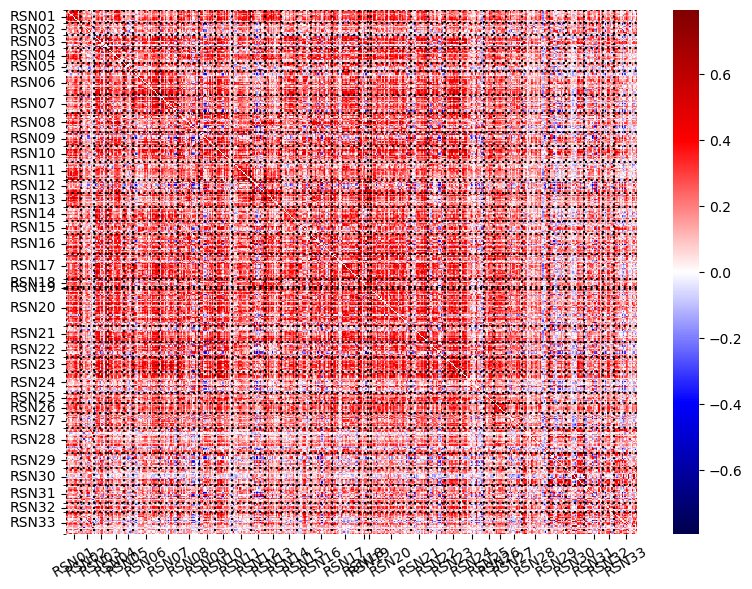

In [4]:
from bold_dementia.connectivity import plot_matrix, Atlas, plot_ordered_matrix
import matplotlib.pyplot as plt
atlas = Atlas.from_name("gillig-regions", False)
plot_matrix(matrices[4], atlas)
plt.show()

In [5]:
from bold_dementia.connectivity import group_groupby

res = group_groupby(matrices, atlas)

In [6]:
grouped_mat = res[0]

In [12]:
grouped_mat[0].values

array([[ 0.18706687,  0.0158128 ,  0.00989972, ...,  0.01367116,
         0.00677379,  0.02332462],
       [ 0.0158128 ,  0.17904587,  0.03339721, ...,  0.08234942,
         0.08275355,  0.10031557],
       [ 0.00989972,  0.03339721,  0.2212507 , ..., -0.00845709,
         0.12151968,  0.02257041],
       ...,
       [ 0.01367116,  0.08234942, -0.00845709, ...,  0.18729907,
         0.04006625,  0.10452574],
       [ 0.00677379,  0.08275356,  0.12151968, ...,  0.04006625,
         0.23222232,  0.07876819],
       [ 0.02332462,  0.10031556,  0.02257041, ...,  0.10452574,
         0.07876819,  0.17555457]], dtype=float32)

In [13]:
gmn = [gm.values for gm in grouped_mat]

In [24]:
import joblib
import numpy as np
from scipy.io import savemat

export_path = matpath / f"intranet_{GROUP}"
gmn = np.stack(gmn, axis=0)
exportp= joblib.dump(gmn, str(export_path) + ".joblib")
savemat(str(export_path) + ".mat", {"matrices": gmn}, appendmat=False) # This is stupid

In [21]:
export = joblib.load(exportp[0])

In [24]:
len(export)

2924

In [26]:
ts = loadmat(matpath / f"{GROUP}_series_ub.mat")["matrices"][0]
ts.shape

(2924,)

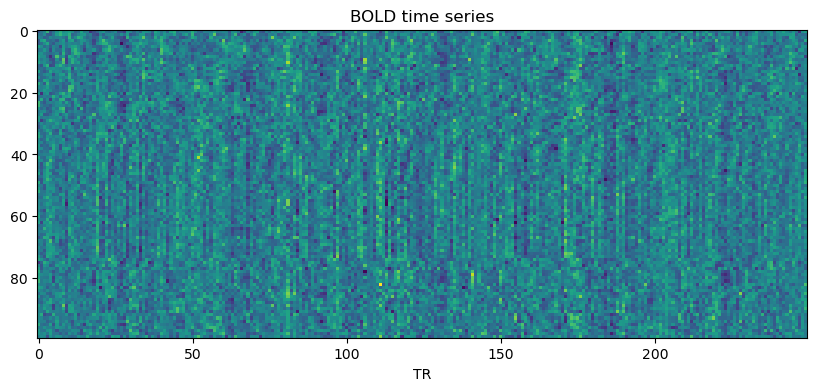

In [28]:
plt.subplots(figsize=(15, 4))
plt.imshow(ts[200][:, :100].T)
plt.xlabel("TR")
plt.title("BOLD time series")
plt.show()

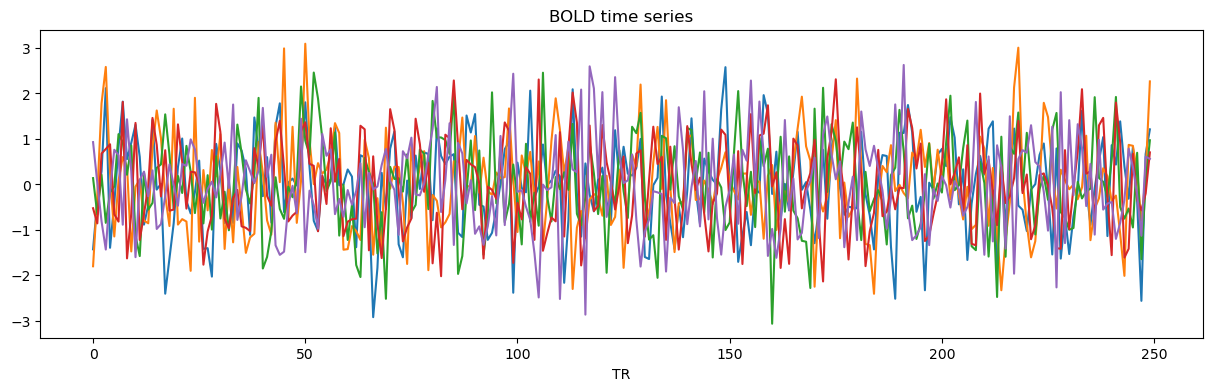

In [29]:
plt.subplots(figsize=(15, 4))
plt.plot(ts[200][:, ::100])
plt.xlabel("TR")
plt.title("BOLD time series")
plt.show()